In [24]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import glob

In [25]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean
import seaborn as sns

In [26]:
# for file_name in glob.glob('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*'):
#     print(file_name)

In [27]:
list_netcdf = []
for file_name in glob.glob("/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc"):
    list_netcdf.append(file_name)

In [28]:
ds_oae = xr.open_mfdataset('/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_oae/*.nc')

In [29]:
lats = ds_oae.variables['nav_lat'][:]
lons = ds_oae.variables['nav_lon'][:]
time = ds_oae.variables['time_counter'][:]
ph = ds_oae.variables['ph'][:]
co2flux = ds_oae.variables['co2flux_cpl'][:]

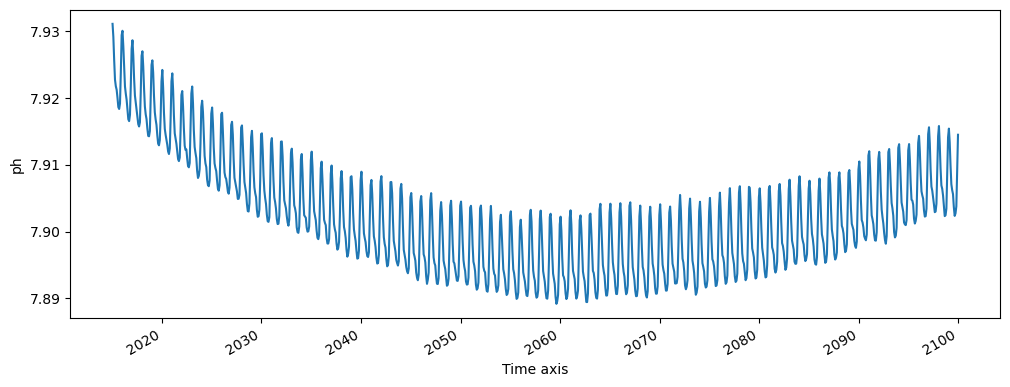

In [30]:
ds_oae.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4)) # global mean for pH with OAE

In [31]:
df = ds_oae.sel(time_counter=slice('2090', '2100'))

In [32]:
dataframe = df.to_dataframe()

In [33]:
dataframe.head()

time_counter_bnds  nav_lon    nav_lat  co2flx  \
time_counter        bnds y x                                                 
2090-01-16 12:00:00 0    0 0        2090-01-01    72.75 -77.010475     0.0   
                           1        2090-01-01    73.25 -77.010475     0.0   
                           2        2090-01-01    73.75 -77.010475     0.0   
                           3        2090-01-01    74.25 -77.010475     0.0   
                           4        2090-01-01    74.75 -77.010475     0.0   

                                    ph  co2flux_cpl  
time_counter        bnds y x                         
2090-01-16 12:00:00 0    0 0  7.751746          0.0  
                           1  7.751746          0.0  
                           2  7.751746          0.0  
                           3  7.751746          0.0  
                           4  7.751746          0.0

In [34]:
dataframe.describe()

,nav_lon,nav_lat,co2flx,ph,co2flux_cpl
count,8.854608e+07,8.854608e+07,8.854608e+07,8.854608e+07,8.854608e+07
mean,-1.020398e+00,5.172927e-01,-6.153042e-10,7.905770e+00,-4.203491e-10
std,1.025694e+02,5.207631e+01,2.331516e-09,1.435005e-01,2.467772e-09
min,-1.799970e+02,-7.701048e+01,-7.239288e-08,5.657776e+00,-5.436534e-08
25%,-9.518312e+01,-5.194667e+01,-1.263377e-09,7.751746e+00,-1.196175e-09
50%,2.482575e+00,2.998630e+00,0.000000e+00,7.975595e+00,0.000000e+00
75%,8.425000e+01,5.047917e+01,0.000000e+00,8.014976e+00,2.412842e-10
max,1.799988e+02,8.988536e+01,6.081992e-08,8.963507e+00,5.325037e-08


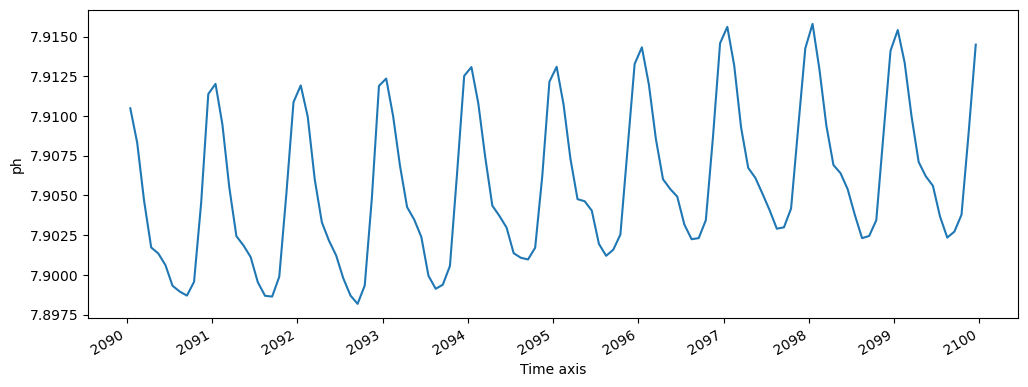

In [35]:
df.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4)) # global from 2090 to 2100

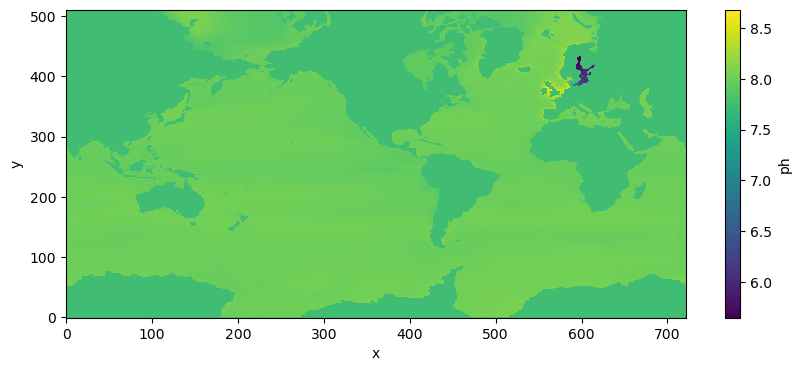

In [36]:
ds_oae.ph.mean(dim=('time_counter')).plot(figsize = (10, 4))

In [37]:
sliced_data = ds_oae.where((-25 < ds_oae.nav_lon) & (ds_oae.nav_lon < 10) & (35 < ds_oae.nav_lat) & (ds_oae.nav_lat < 70), drop=True)

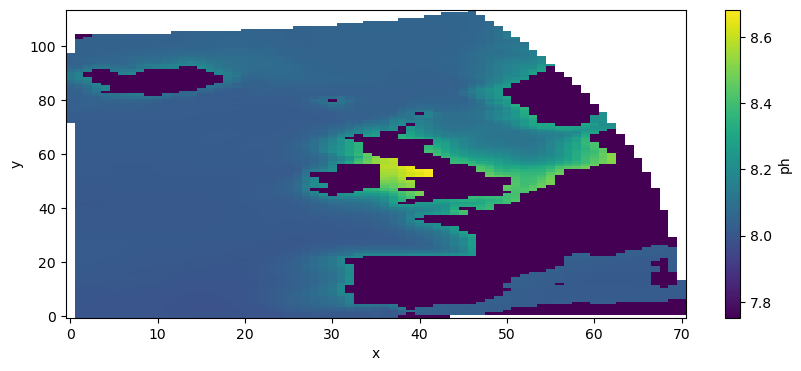

In [38]:
sliced_data.ph.mean(dim=('time_counter')).plot(figsize = (10, 4))

Text(0.5, 1.02, 'pH seasonal average')

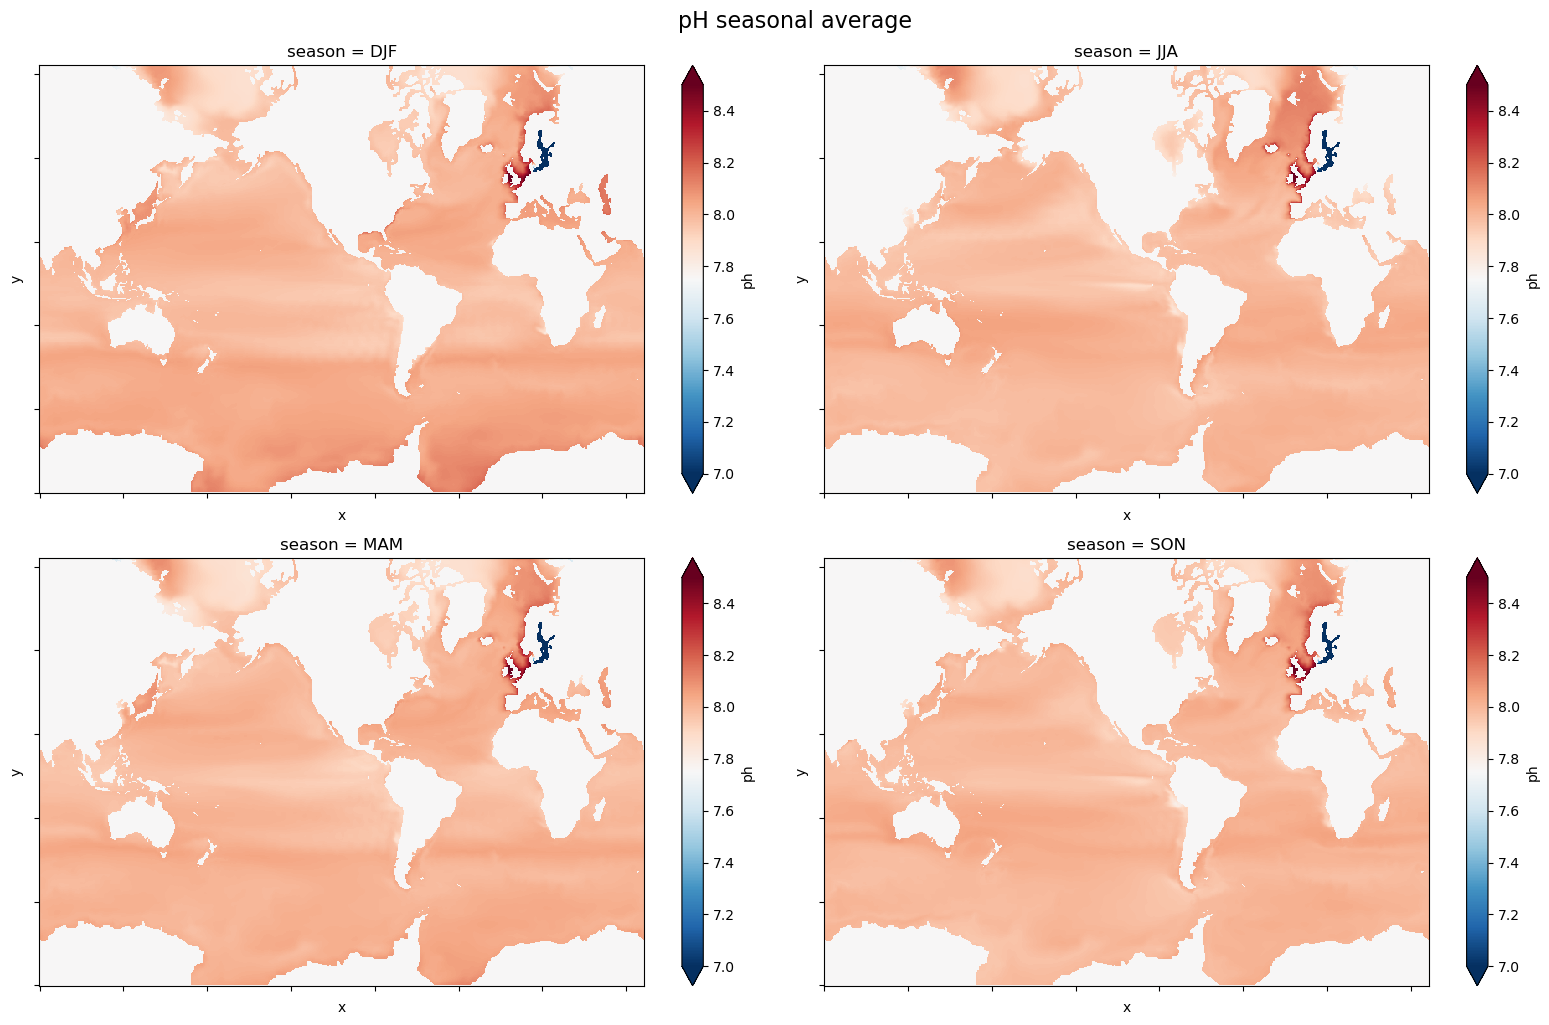

In [39]:
# global average

ds_season = ds_oae.ph.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7, vmax=8.5, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('pH seasonal average', fontsize=16, y=1.02)

Text(0.5, 1.02, 'pH seasonal flux')

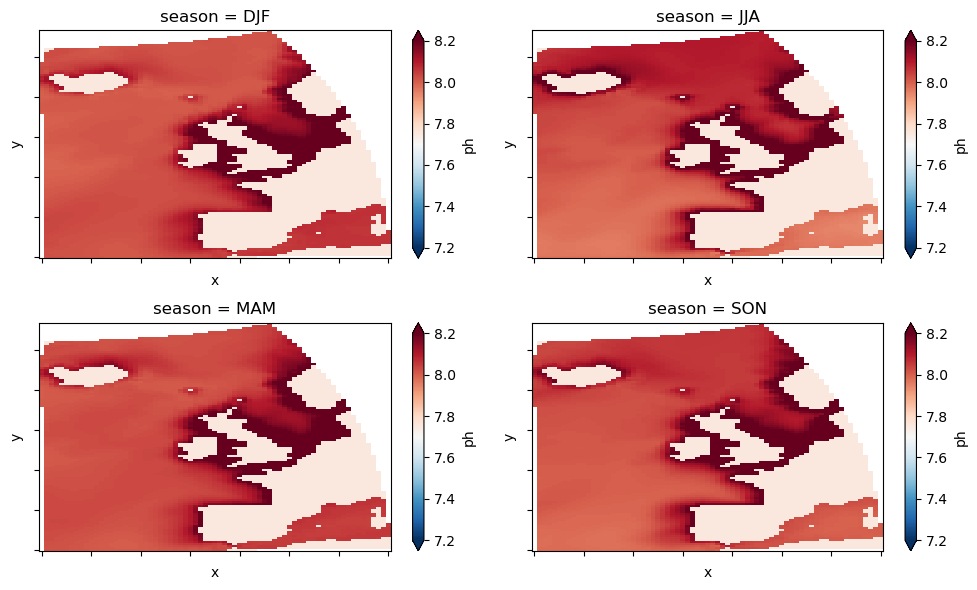

In [40]:
# regional from 2015 to 2100

ds_season = sliced_data.ph.groupby('time_counter.season').mean('time_counter')
fig_region, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7.2, vmax=8.2, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('pH seasonal flux', fontsize=16, y=1.02)

In [41]:
df_frame = sliced_data.to_dataframe()

In [42]:
# regional from 2015 to 2100

df_frame.describe()

,co2flx,ph,co2flux_cpl,nav_lon,nav_lat
count,1.396584e+07,1.396584e+07,1.396584e+07,1.651176e+07,1.651176e+07
mean,-3.927259e-09,7.992987e+00,-5.010138e-09,-5.237904e+00,5.415880e+01
std,5.713459e-09,1.701808e-01,6.270380e-09,1.177112e+01,1.028899e+01
min,-7.401218e-08,7.751746e+00,-5.953363e-08,-2.524298e+01,3.483637e+01
25%,-5.745272e-09,7.946788e+00,-6.745805e-09,-1.527997e+01,4.556156e+01
50%,-2.615747e-09,8.017798e+00,-3.725913e-09,-5.307101e+00,5.483563e+01
75%,0.000000e+00,8.061838e+00,-6.924094e-10,4.461264e+00,6.303620e+01
max,1.367495e-08,8.963507e+00,1.176098e-08,2.402604e+01,7.228801e+01


In [43]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_flux = sliced_data["ph"].sel(time_counter=slice(start_date, end_date))

In [44]:
ph_season_summary = ph_flux.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years = ph_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()
ph_seasonal_mean = ph_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


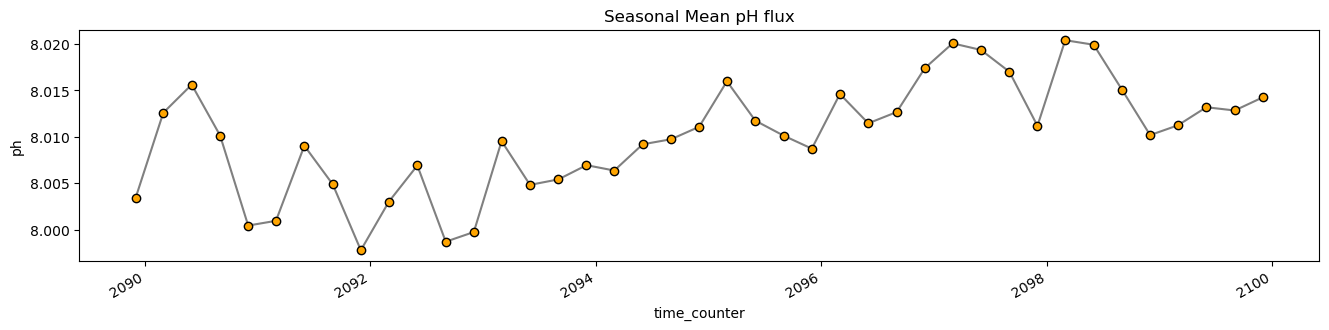

In [45]:
f, ax = plt.subplots(figsize=(16, 3))
ph_seasonal_mean.plot(marker="o",
                        color="grey",
                        markerfacecolor="orange",
                        markeredgecolor="black")
ax.set(title="Seasonal Mean pH flux")
plt.show()

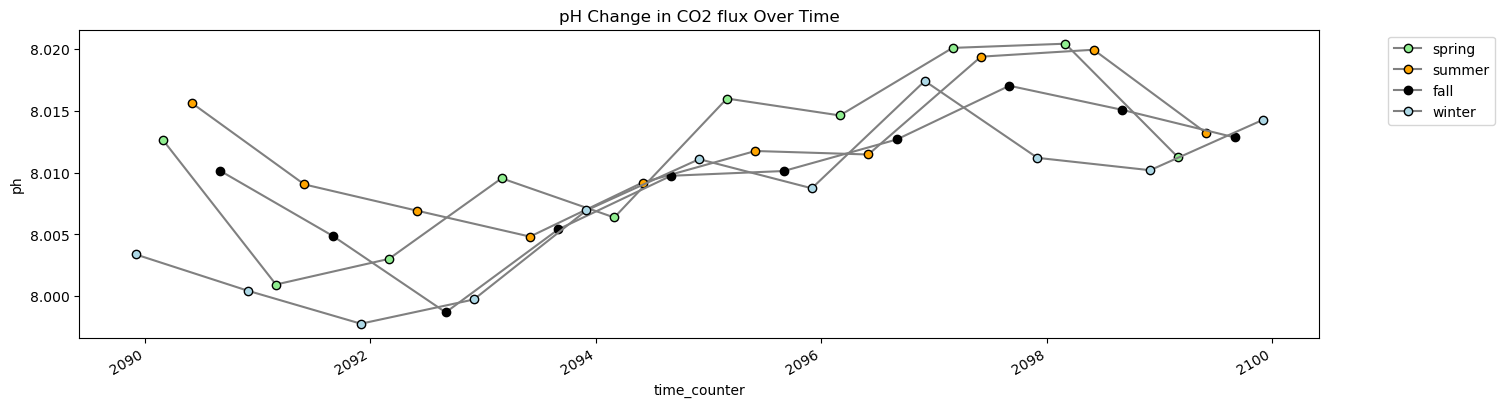

In [48]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in ph_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="pH Change in CO2 flux Over Time")
plt.show()

In [50]:
ph_months_summary = ph_flux.groupby('time_counter.month').mean('time_counter', skipna=True)
ph_months_mean_all_years = ph_flux.resample(time_counter='MS', keep_attrs=True).mean()
ph_monthly_mean = ph_months_mean_all_years.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


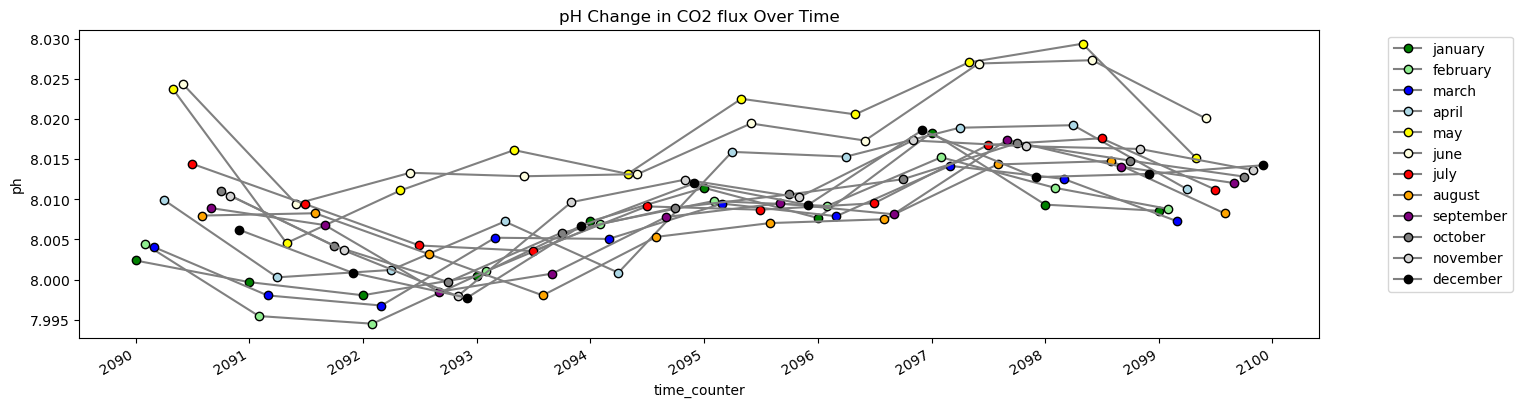

In [51]:
colors = {1: "green", 2: "lightgreen", 3: "blue", 4: "lightblue", 5: "yellow", 6: "lightyellow", 7: "red", 8: "orange", 9: "purple", 10: "grey", 11: "lightgrey", 12: "black"}
months = {1: "january", 2: "february", 3: "march", 4: "april", 5: "may", 6: "june", 7: "july", 8: "august", 9: "september", 10: "october", 11: "november", 12: "december"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in ph_monthly_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=months[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title = "pH Change in CO2 flux Over Time")
plt.show()

In [19]:
sliced_frame = sliced_data.sel(time_counter=slice('2090', '2100'))

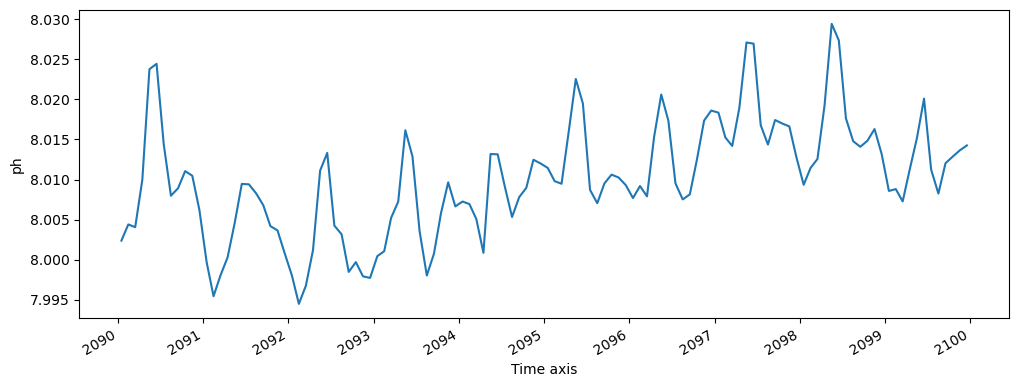

In [22]:
sliced_frame.ph.mean(dim=('y', 'x')).plot(figsize= (12, 4))

Text(0.5, 1.02, 'pH seasonal flux')

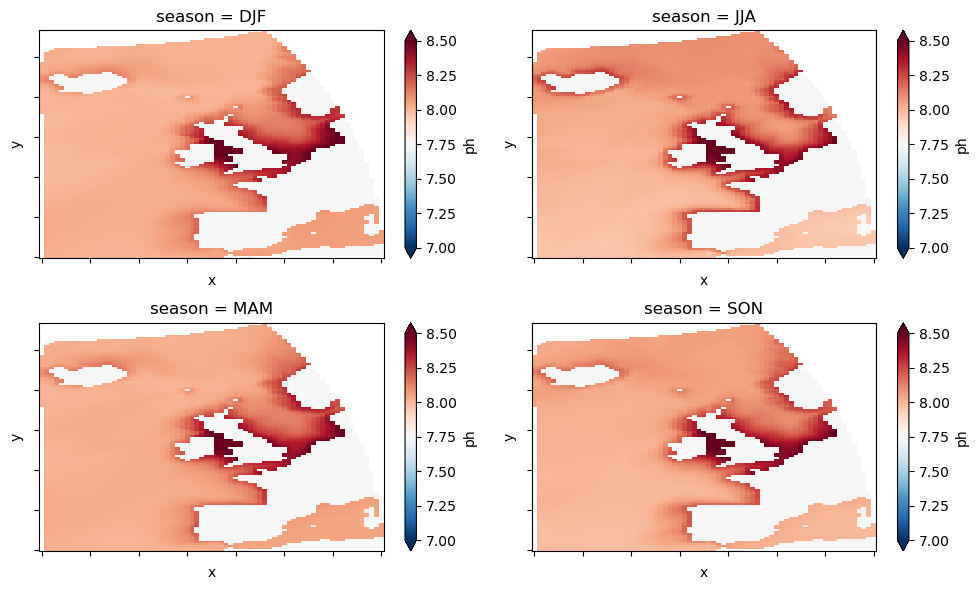

In [26]:
# regional from 2090 to 2100

ds_season_eu = sliced_frame.ph.groupby('time_counter.season').mean('time_counter')
fig_region, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=7, vmax=8.5, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('pH seasonal flux', fontsize=16, y=1.02)

In [27]:
df_oae = sliced_frame.to_dataframe()

In [30]:
df_oae_overview = df_oae.describe()

In [34]:
df_oae_overview.to_excel('pH_oae_2090_2100_eu.xlsx')

In [47]:
# last seven days of the simulation

ds = "/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc"

cmap = cmocean.cm.curl
with xr.open_dataset(ds) as xadf:
    pd = xadf.isel(time_counter=slice(-5,None), y=slice(300, 500), x=slice(400, 700)) #last seven days
    facet = pd['ph'].plot(x='x', y='y', col='time_counter',col_wrap=5,robust=True,figsize=(16,2.5),cmap=cmap)

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/chiaraciscato/Desktop/geomar/FOCI data/data_transfer/ph_co2flx_base/*.nc'

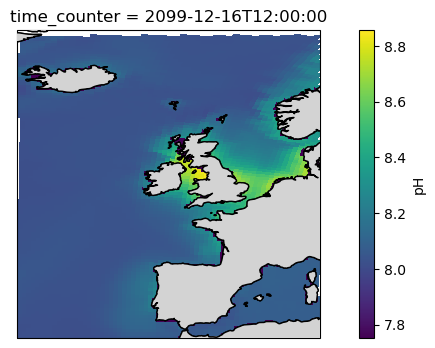

In [21]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

sliced_frame.ph[119].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([-25, 10, 35, 70]) # plot a region